In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [26]:
import requests 
from bs4 import BeautifulSoup as bs
import re 

In [13]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [43]:
kindle_reviews =[]

In [42]:
for i in range(1,20):
  ip=[]  
  #url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
  url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser") 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
  
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
kindle_reviews=kindle_reviews+ip   

In [16]:
ip_rev_string = " ".join(kindle_reviews)

In [41]:
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [30]:

ip_reviews_words = ip_rev_string.split(" ")

In [38]:
with open('stop.txt','r')as sw:
    stopwords = sw.read()
stopwords = stopwords.split("\n")

In [39]:
temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

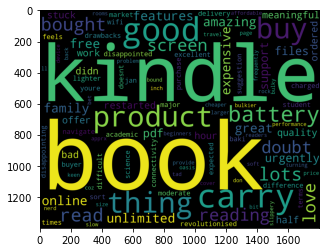

In [33]:
ip_rev_string = " ".join(ip_reviews_words)

wordcloud_ip = WordCloud(background_color='black',width=1800,height=1400).generate(ip_rev_string)
plt.imshow(wordcloud_ip)

In [34]:
with open('positive-words.txt','r')as pos:
     poswords = pos.read().split("\n")  
poswords = poswords[36:]

In [35]:
with open('negative-words.txt','r') as neg:
  negwords = neg.read().split("\n")
negwords = negwords[37:]

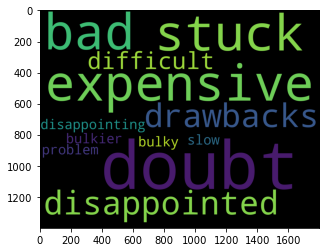

In [36]:
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.imshow(wordcloud_neg_in_neg)

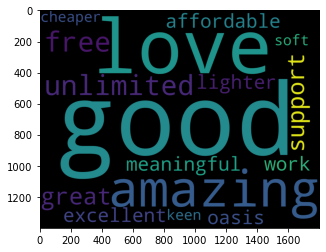

In [40]:
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)